# Studying The Pokemon Dataset 

# Downloading the Data

In [106]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'/Users/saurabhyelne/pycon-pandas-tutorial'

In [29]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [32]:
cd /users/saurabhyelne

/Users/saurabhyelne


In [33]:
poke=pd.read_excel("pokemon.xlsx")

In [34]:
poke.head()

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
1,001,Bulbasaur,POISON,318,45,49,49,65,65,45
2,002,Ivysaur,GRASS,405,60,62,63,80,80,60
3,002,Ivysaur,POISON,405,60,62,63,80,80,60
4,003,Venusaur,GRASS,525,80,82,83,100,100,80


In [185]:
poke.shape

(1168, 10)

## Interesting Count

In [261]:
p=poke
p=p.drop_duplicates('Name') # Getting rid of 395 Duplicate rows
p.shape

(773, 10)

In [262]:
p.Attack.mean()

77.31824062095731

In [217]:
p=poke
p=p.drop_duplicates('Name')
a=p[['Name','Type','Attack']]
a[a.Attack>=77].groupby('Type').size().sort_values(ascending=False).head(5)


Type
WATER     43
NORMAL    43
GRASS     30
ROCK      28
FIRE      28
dtype: int64

In [189]:
p.Defense.mean()

72.55239327296249

In [213]:
p=poke
p=p.drop_duplicates('Name')
d=p[['Name','Type','Defense']]
d[d.Defense>=73].groupby('Type').size().sort_values(ascending=False).head(5)

Type
WATER    50
ROCK     30
GRASS    27
BUG      27
STEEL    23
dtype: int64

In [214]:
p=poke
p=p.drop_duplicates('Name')
p['Special Attack'].mean()

71.18240620957309

In [215]:
p=poke
p=p.drop_duplicates('Name')
sa=p[['Name','Type','Special Attack']]
sa[sa['Special Attack']>=71].groupby('Type').size().sort_values(ascending=False).head(5)

Type
WATER       50
GRASS       38
PSYCHIC     38
ELECTRIC    33
FIRE        33
dtype: int64

In [219]:
p['Special Defense'].mean()

70.6261319534282

In [220]:
sd=p[['Name','Type','Special Defense']]
sd[sd['Special Defense']>=71].groupby('Type').size().sort_values(ascending=False).head(5)

Type
WATER      47
PSYCHIC    32
GRASS      31
BUG        27
NORMAL     26
dtype: int64

#### The Water type Pokemon has the most pokemon count which are above average in all skills i.e. Attack,Defense,Special Attack and Special Defense. 

## Trends

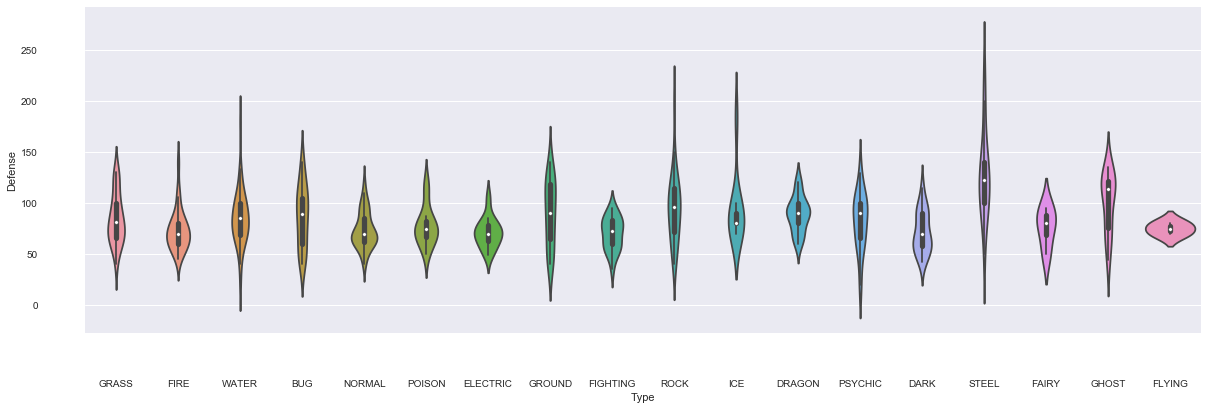

In [243]:
p=poke
p=p.drop_duplicates('Name')
a=p[['Type','Attack','Defense']]
a=a[(a.Attack >=77)]#.unstack(0)#.plot()
f, ax = plt.subplots(figsize=(20, 6))
sns.violinplot(x=a.Type,y=a.Defense,split=True)
sns.despine(offset=40, trim=False)


#### Except for Normal, Electric,  Dark type of pokemons, all others types have more than average defense points given they have more than average attack points.

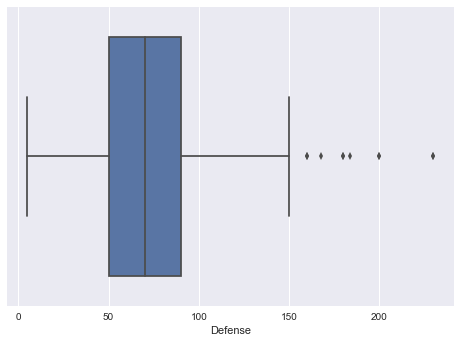

In [242]:
p=poke
p=p.drop_duplicates('Name')
a=p[['Attack','Defense']]
a=a[a.Attack >=77]
#plt.figure(figsize=(12,4))
sns.boxplot(p.Defense)



#### Just over 50% Pokemon having more than average points attack points have more than than averave defense points

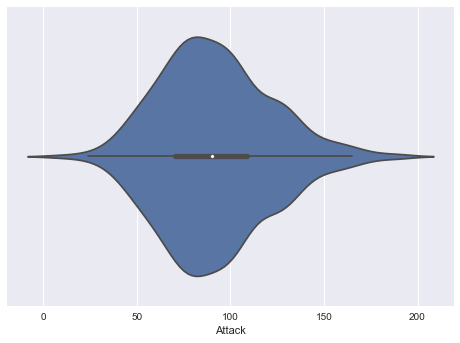

In [257]:
p=p[['Attack','Defense']]
p=p[p.Defense >=71]
sns.violinplot(x=p.Attack)

#### More than 50% Pokemon having more than average attack skills also have more than average defense skills.

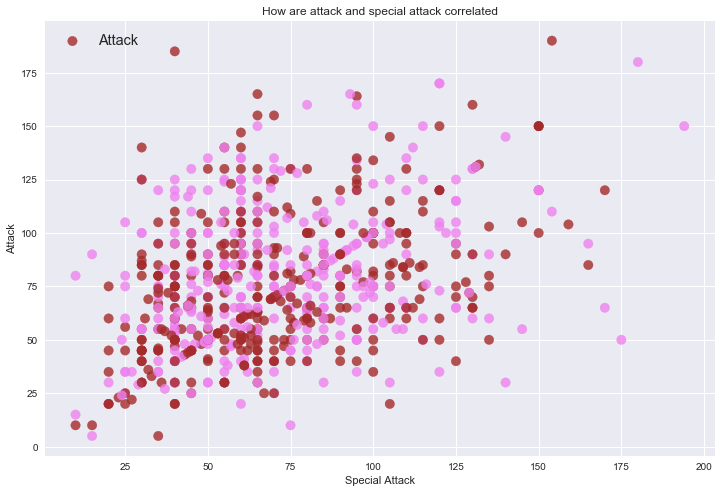

In [363]:
c=p[['Special Attack','Special Defense','Attack']]
plt.figure(figsize=(12,8))
plt.scatter(x=c['Special Attack'],y=c['Attack'],color=('brown','violet'),s=90,alpha=0.8)
plt.legend(loc=2,fontsize='large')
plt.xlabel('Special Attack')
plt.ylabel('Attack')
plt.title('How are attack and special attack correlated')

#### Special Attack And Attack are positively correlated

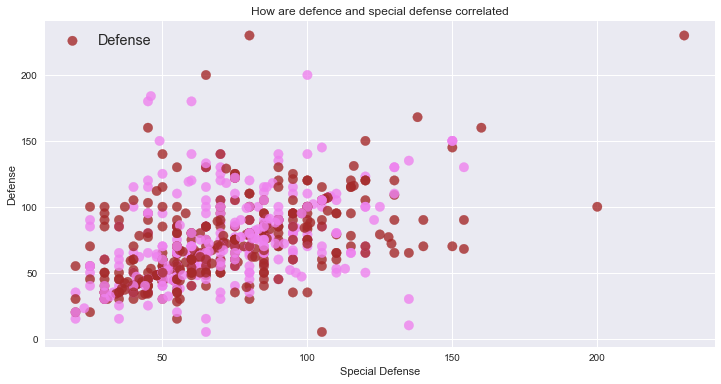

In [366]:
c=p[['Special Attack','Special Defense','Defense']]
plt.figure(figsize=(12,6))
plt.scatter(x=c['Special Defense'],y=c['Defense'],color=('brown','violet'),s=90,alpha=0.8)
plt.legend(loc=2,fontsize='large')
plt.xlabel('Special Defense')
plt.ylabel('Defense')
plt.title('How are defence and special defense correlated')

#### Special defense And defense are positively correlated

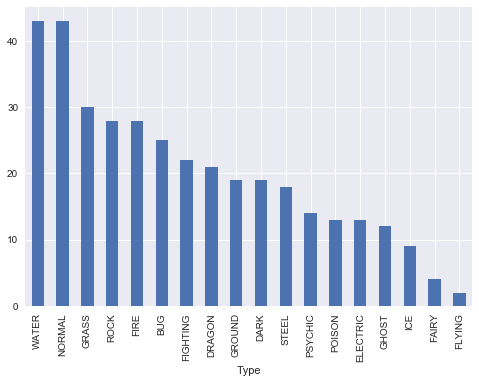

In [309]:
att=p[p.Attack>=77]
att=att.groupby('Type').size()
att.sort_values(ascending=False).plot(kind='bar')

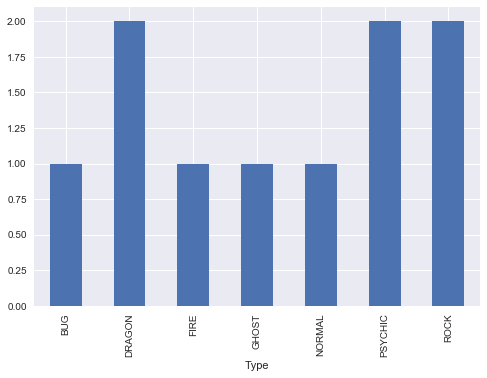

In [325]:
att=p[['Attack','Name','Type']].sort_values('Attack',ascending=False).head(10)
att.groupby('Type').size().plot(kind='bar')

#### There is no Water Type pokemon in the top 10 Attacking Pokemons

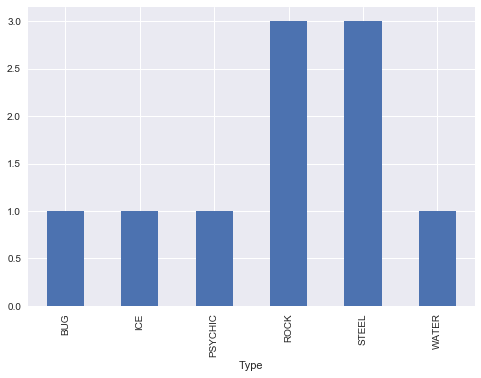

In [329]:
dff =p[['Defense','Name','Type']].sort_values('Defense',ascending=False).head(10)
dff.groupby('Type').size().plot(kind='bar')

#### There is only 1 Water type pokemon in top 10 Defensive Pokemons

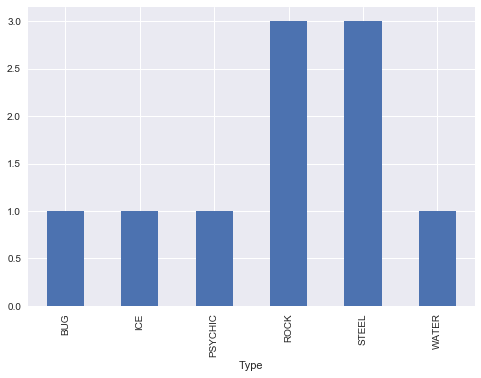

In [330]:
spatt =p[['Special Attack','Name','Type']].sort_values('Special Attack',ascending=False).head(10)
dff.groupby('Type').size().plot(kind='bar')

#### There is only 1 Water type pokemon in top 10 Pokemons with Special Attack

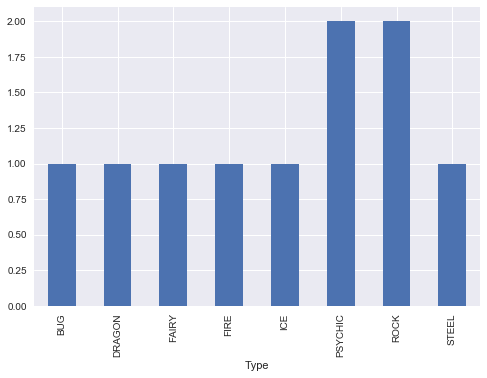

In [333]:
sdff =p[['Special Defense','Name','Type']].sort_values('Special Defense',ascending=False).head(10)
sdff.groupby('Type').size().plot(kind='bar')

#### There is no Water type pokemon in top 10 Pokemons with Special Defense